In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
D = 3
N = 1e7
true_nlist = [1.5, 2, 4, 8, 16]
#true_nlist = list(range(2, 21))
m = 2/3
nlist = [round((tnn-2*m)/(1-m),4) for tnn in true_nlist]
s = 1.0
sclist = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
sclist = [0.1, 0.5, 1.0]
L = 1.0
num_empty = 200
res_dir = 'nsc-friday'
randix = 0

numempty0 succeed nsc-friday-numempty0/D=3_n=0.5_N=1.00e+07_s=1.0_L=1.0_c=1.00000e+01_r=0
numempty0 succeed nsc-friday-numempty0/D=3_n=2.0_N=1.00e+07_s=1.0_L=1.0_c=1.00000e+01_r=0
numempty0 succeed nsc-friday-numempty0/D=3_n=8.0_N=1.00e+07_s=1.0_L=1.0_c=1.00000e+01_r=0
numempty0 succeed nsc-friday-numempty0/D=3_n=20.0_N=1.00e+07_s=1.0_L=1.0_c=1.00000e+01_r=0
numempty0 succeed nsc-friday-numempty0/D=3_n=44.0_N=1.00e+07_s=1.0_L=1.0_c=1.00000e+01_r=0
numempty0 succeed nsc-friday-numempty0/D=3_n=0.5_N=1.00e+07_s=1.0_L=1.0_c=2.00000e+00_r=0
numempty0 succeed nsc-friday-numempty0/D=3_n=2.0_N=1.00e+07_s=1.0_L=1.0_c=2.00000e+00_r=0
numempty0 succeed nsc-friday-numempty0/D=3_n=8.0_N=1.00e+07_s=1.0_L=1.0_c=2.00000e+00_r=0
numempty0 succeed nsc-friday-numempty0/D=3_n=20.0_N=1.00e+07_s=1.0_L=1.0_c=2.00000e+00_r=0
numempty0 succeed nsc-friday-numempty0/D=3_n=44.0_N=1.00e+07_s=1.0_L=1.0_c=2.00000e+00_r=0
succeed nsc-friday/D=3_n=0.5_N=1.00e+07_s=1.0_L=1.0_c=1.00000e+00_r=0
succeed nsc-friday/D=3_n=2

<ipython-input-27-da7ea108b88f>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


succeed nsc-friday/D=3_n=20.0_N=1.00e+07_s=1.0_L=1.0_c=1.00000e+00_r=0
succeed nsc-friday/D=3_n=44.0_N=1.00e+07_s=1.0_L=1.0_c=1.00000e+00_r=0


<Figure size 432x288 with 0 Axes>

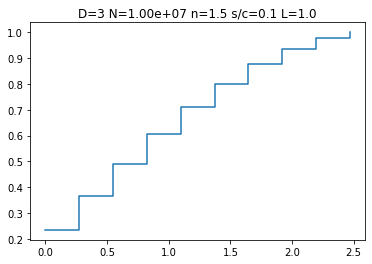

<Figure size 432x288 with 0 Axes>

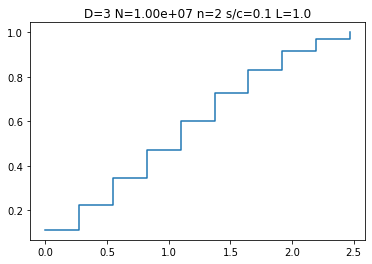

<Figure size 432x288 with 0 Axes>

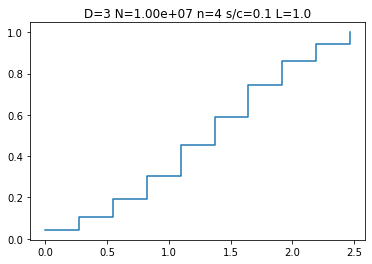

<Figure size 432x288 with 0 Axes>

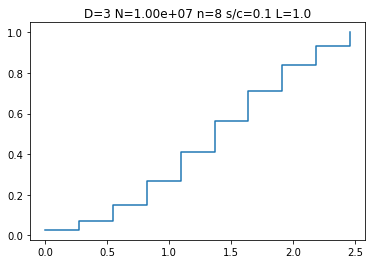

<Figure size 432x288 with 0 Axes>

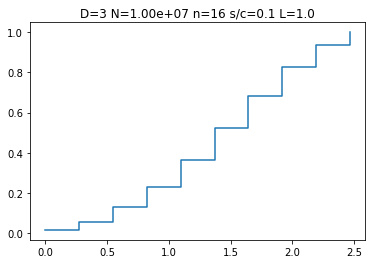

<Figure size 432x288 with 0 Axes>

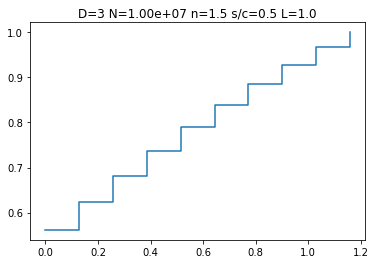

<Figure size 432x288 with 0 Axes>

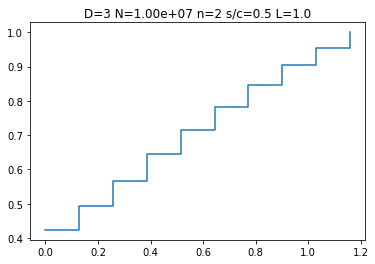

<Figure size 432x288 with 0 Axes>

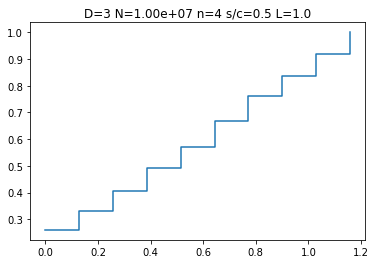

<Figure size 432x288 with 0 Axes>

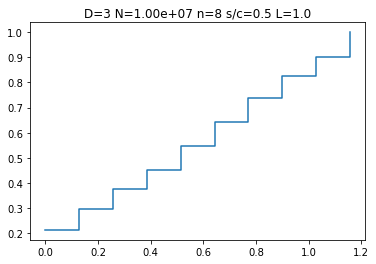

<Figure size 432x288 with 0 Axes>

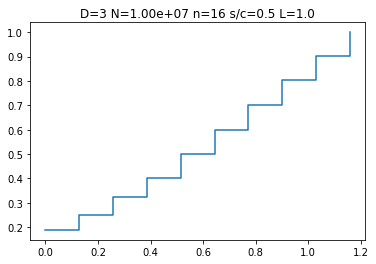

<Figure size 432x288 with 0 Axes>

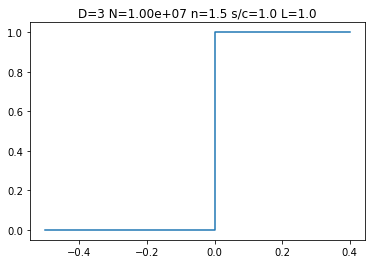

<Figure size 432x288 with 0 Axes>

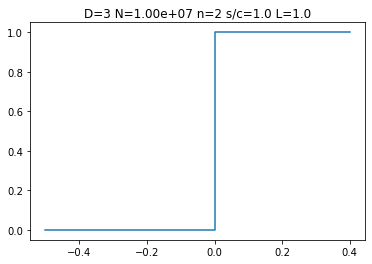

<Figure size 432x288 with 0 Axes>

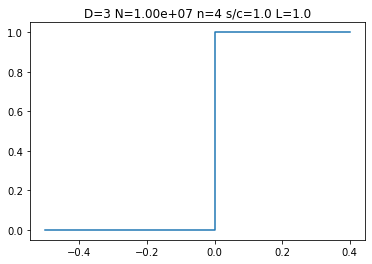

<Figure size 432x288 with 0 Axes>

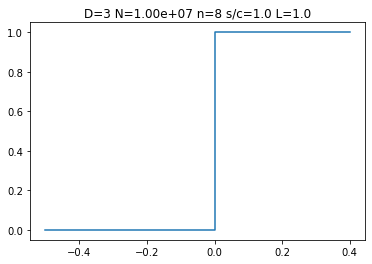

<Figure size 432x288 with 0 Axes>

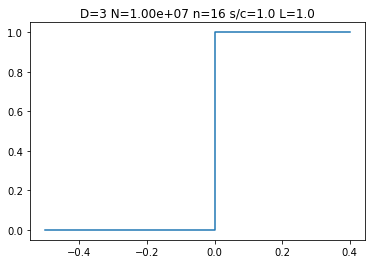

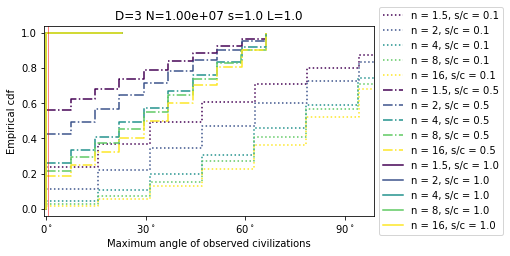

In [27]:
plot_data = {}
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = [':', '-.', '-']
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        true_n = true_nlist[nix]
        fout = (
            f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
            f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
        )
        try:
            res = pd.read_csv(fout+'.csv')
            print("succeed " + fout)
        except:
            try:
                fout = (
                    f"nsc-friday-numempty0/D={D}_n={float(n)}_N={N:.2e}_"
                    f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
                )
                res = pd.read_csv(fout+'.csv')
                print("numempty0 succeed " + fout)
            except:
                assert(0)
                print("fail " + fout)
        fig = plt.figure()
        (counts, bins, patches) = plt.hist(
            res.MaxAngle, cumulative=True, histtype='step', density=True)
        fig.clf()
        plt.figure()
        plt.step(bins[0:-1], counts, where='post')
        plt.title(f'D={D} N={N:.2e} n={true_n} s/c={s/c:.1f} L={L:.1f}')
        plot_data[(true_n, sc)] = (bins[0:-1], counts)
fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(111)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_data[(true_n, sc)]
        plt.step(bins, counts, scstyles[scix], color=mycols[nix], where='post')
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
#leg = [f"n = {nn}" for nn in true_nlist]
plt.legend(leg, loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.plot([0.009, 0.009], [-0.05, 1.05],'r', linewidth=0.5);
ax.set_position([0.1,0.1,0.5,0.8])
plt.gca().set_ylabel('Empirical cdf')
plt.gca().set_xlabel('Maximum angle of observed civilizations');
plt.gca().set_title(f'D={D} N={N:.2e} s={s:.1f} L={L:.1f}');
#plt.gca().set_xscale('log')
plt.gca().set_xticks([0, 0.5*math.pi*(1/3), 0.5*math.pi*(2/3), 0.5*math.pi*(3/3)]);
plt.gca().set_xticklabels(['0$^\circ$', '30$^\circ$', '60$^\circ$', '90$^\circ$']);
plt.gca().set_ylim(-0.04, 1.04)
plt.gca().set_xlim(-0.01, 0.5*math.pi*(3/3)*1.1)
plt.tight_layout(rect=(0, 0.05, 0.7, 1))
fig.savefig('figures-friday/plotG.png', dpi=200)

In [11]:
import math
0.5*math.pi

1.5707963267948966

In [13]:
[0, 0.009, 0.5*math.pi, math.pi]
['0', 'moon', '$\pi/2$', '$\pi$']

['0', 'moon', '$\\pi/2$', '$\\pi$']

In [29]:
true_nlist = [6]
[round((tnn-2*m)/(1-m),4) for tnn in true_nlist]


[14.0]